In [24]:
import pandas as pd
import numpy as np
import re

# Loading the dataset
df = pd.read_csv('/Users/aakash/Desktop/OneDrive_1_18-06-2025/open_ave_data.csv')

# Fill missing values for concatenation
df = df.fillna("")

# Combine relevant text columns into one for analysis
df["combined_text"] = (
    df["ReportText"].astype(str) + " " +
    df["findings"].astype(str) + " " +
    df["clinicaldata"].astype(str) + " " +
    df["ExamName"].astype(str) + " " +
    df["impression"].astype(str)
)
print(df.head())

   Unnamed: 0                                         ReportText  \
0           0  EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...   
1           1  EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...   
2           2  EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...   
3           3  Exam: - CHEST-PORTABLE History: Chest pain Com...   
4           4  EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/17/2021 ...   

                                            findings  \
0  FINDINGS: Lungs/Pleura: No focal opacities evi...   
1  FINDINGS: Lungs/Pleura: No focal opacities evi...   
2  FINDINGS: Lungs/Pleura: No focal opacities evi...   
3  Findings: Heart size appears normal. Lungs cle...   
4  FINDINGS: Lungs/Pleura: No focal opacities evi...   

                                        clinicaldata  \
0                      CLINICAL HISTORY: Cough. \n\n   
1                 CLINICAL HISTORY: CHEST PAIN. \n\n   
2                 CLINICAL HISTORY: CHEST PAIN. \n\n   
3                           Hi

In [25]:
# Define simple tokenization functions
def basic_tokenize(text):
    # Returns a list of words, removes punctuation and lowers the case
    return re.findall(r'\b\w+\b', text.lower())

def simple_sentence_count(text):
    # Counts '.', '!', '?'
    return len(re.findall(r'[.!?]', text))

# Apply text statistics
df["num_words"] = df["combined_text"].apply(lambda x: len(basic_tokenize(x)))
df["num_sentences"] = df["combined_text"].apply(lambda x: simple_sentence_count(x))
df["avg_word_length"] = df["combined_text"].apply(
    lambda x: np.mean([len(w) for w in basic_tokenize(x)]) if basic_tokenize(x) else 0)
df["unique_words"] = df["combined_text"].apply(lambda x: len(set(basic_tokenize(x))))

# Display summary statistics
print(df[["num_words", "num_sentences", "avg_word_length", "unique_words"]].describe())

        num_words  num_sentences  avg_word_length  unique_words
count  954.000000     954.000000       954.000000    954.000000
mean   117.777778      16.777778         5.540329     46.394130
std     38.146359       6.368443         0.364663     10.998512
min     34.000000       0.000000         4.236842     15.000000
25%     96.000000      12.000000         5.282051     39.000000
50%    108.000000      18.000000         5.595178     44.000000
75%    128.000000      20.000000         5.750000     51.000000
max    340.000000      38.000000         6.726027     91.000000


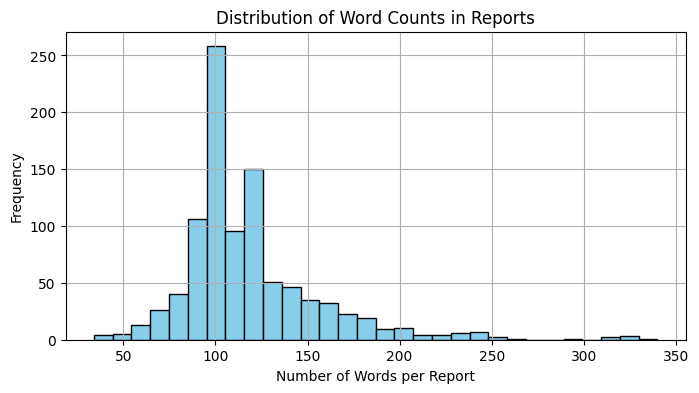

In [4]:
plt.figure(figsize=(8, 4))
df['num_words'].hist(bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of Words per Report')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Reports')
plt.show()

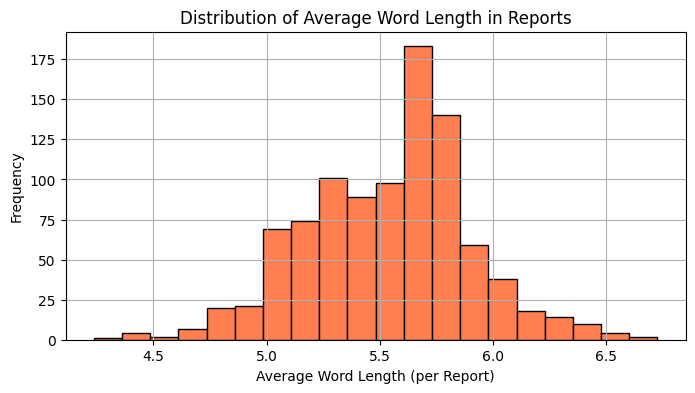

In [5]:
plt.figure(figsize=(8, 4))
df["avg_word_length"].hist(bins=20, color='coral', edgecolor='black')
plt.xlabel('Average Word Length (per Report)')
plt.ylabel('Frequency')
plt.title('Distribution of Average Word Length in Reports')
plt.show()

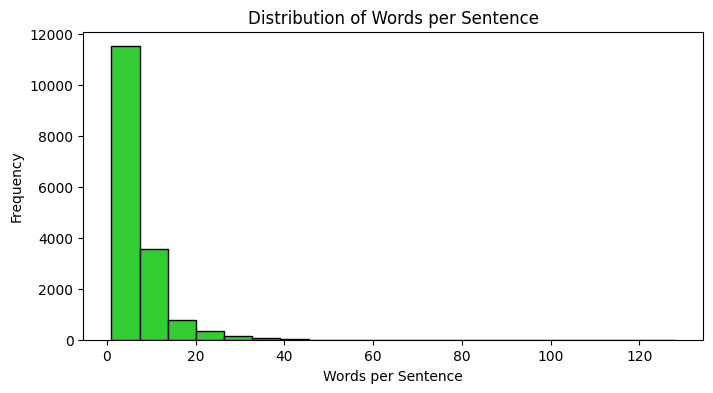

In [6]:
sentence_word_counts = []

for text in df["combined_text"]:
    sentences = re.split(r'[.!?]', text)
    for sentence in sentences:
        count = len(basic_tokenize(sentence))
        if count > 0:
            sentence_word_counts.append(count)

plt.figure(figsize=(8,4))
plt.hist(sentence_word_counts, bins=20, color='limegreen', edgecolor='black')
plt.xlabel('Words per Sentence')
plt.ylabel('Frequency')
plt.title('Distribution of Words per Sentence')
plt.show()

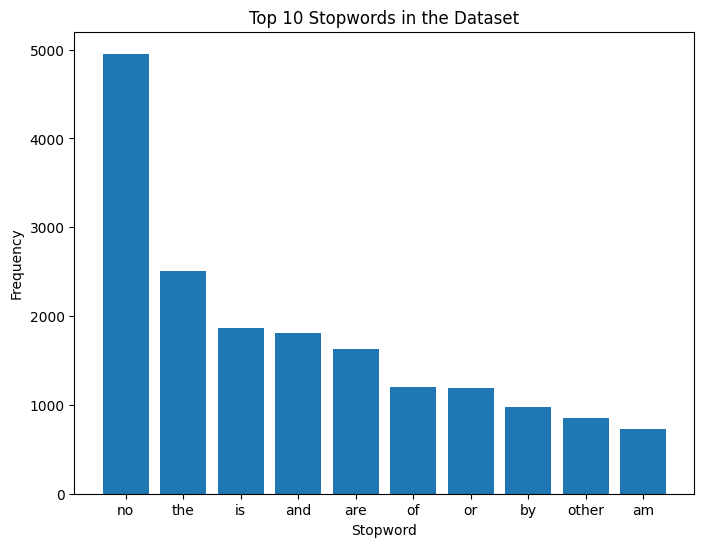

In [8]:
import matplotlib.pyplot as plt

all_text = ' '.join(df["combined_text"].tolist())

# You can use nltk's stopwords if installed, or define a basic list
try:
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
except:
    # Fallback: basic set of English stopwords
    stop_words = set([
        'the', 'and', 'is', 'in', 'to', 'of', 'for', 'on', 'with', 'as', 'by', 'at', 
        'from', 'that', 'this', 'an', 'be', 'are', 'was', 'it', 'or', 'which', 'a', 
        'after', 'over', 'under'
    ])

# Tokenize all words
all_words = basic_tokenize(all_text)

# Count stopword frequencies
stopword_counts = {}
for word in all_words:
    if word in stop_words:
        stopword_counts[word] = stopword_counts.get(word, 0) + 1

# Sort and get top N stopwords
top_n = 10
sorted_sw = sorted(stopword_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]
words, counts = zip(*sorted_sw)

# Plot histogram
plt.figure(figsize=(8,6))
plt.bar(words, counts)
plt.xlabel('Stopword')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Stopwords in the Dataset')
plt.show()


[('chest', 4766), ('exam', 2956), ('normal', 2508), ('findings', 2014), ('view', 1918), ('comparison', 1898), ('impression', 1888), ('none', 1826), ('date', 1548), ('pleural', 1520), ('lungs', 1494), ('pneumothorax', 1434), ('history', 1384), ('1', 1380), ('effusion', 1304)]


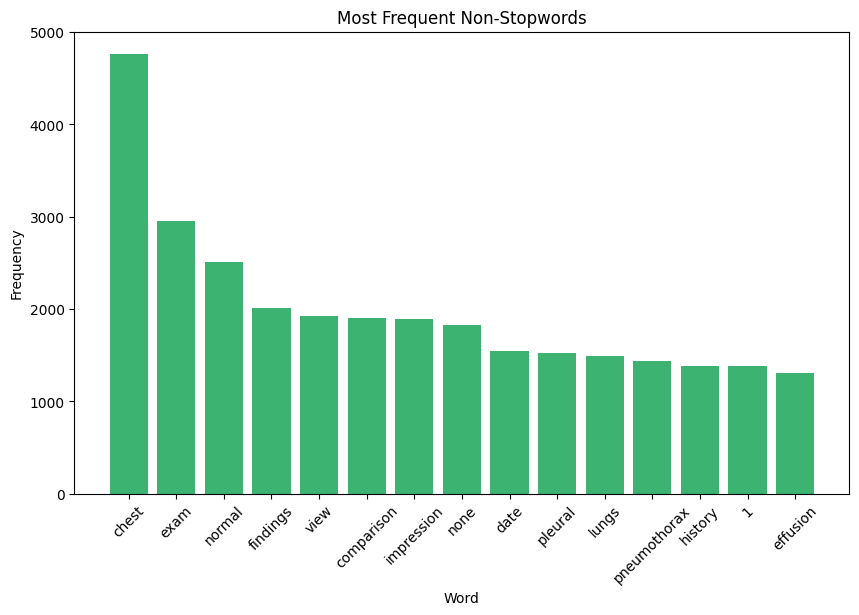

In [9]:
from collections import Counter

# Tokenize all text
all_words = basic_tokenize(all_text)

# Filter out stopwords
non_stopwords = [word for word in all_words if word not in stop_words]

# Count occurrences
counter = Counter(non_stopwords)

# Get top 15 non-stopwords
top_non_stop = counter.most_common(15)
print(top_non_stop)

# Plot them
words, counts = zip(*top_non_stop)
plt.figure(figsize=(10,6))
plt.bar(words, counts, color='mediumseagreen')
plt.title("Most Frequent Non-Stopwords")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

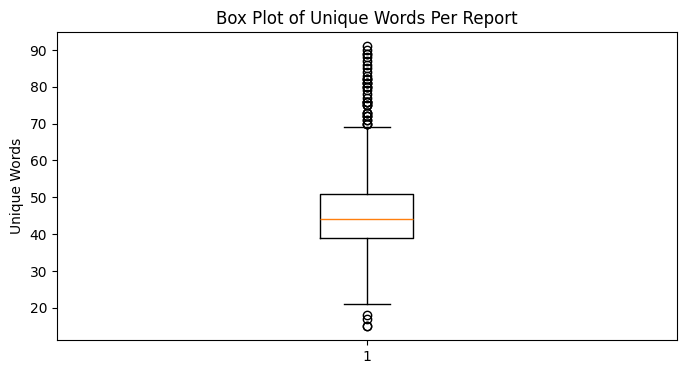

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.boxplot(df['unique_words'])
plt.title("Box Plot of Unique Words Per Report")
plt.ylabel("Unique Words")
plt.show()

In [15]:
from collections import Counter
from itertools import islice
import matplotlib.pyplot as plt

def get_ngrams(words, n):
    return zip(*(islice(words, i, None) for i in range(n)))

# Tokenize all text
all_words = basic_tokenize(all_text)

# Generate bigrams and trigrams
bigrams = list(get_ngrams(all_words, 2))
trigrams = list(get_ngrams(all_words, 3))

bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

# Get the top N
top_n = 10
top_bigrams = bigram_counts.most_common(top_n)
top_trigrams = trigram_counts.most_common(top_n)

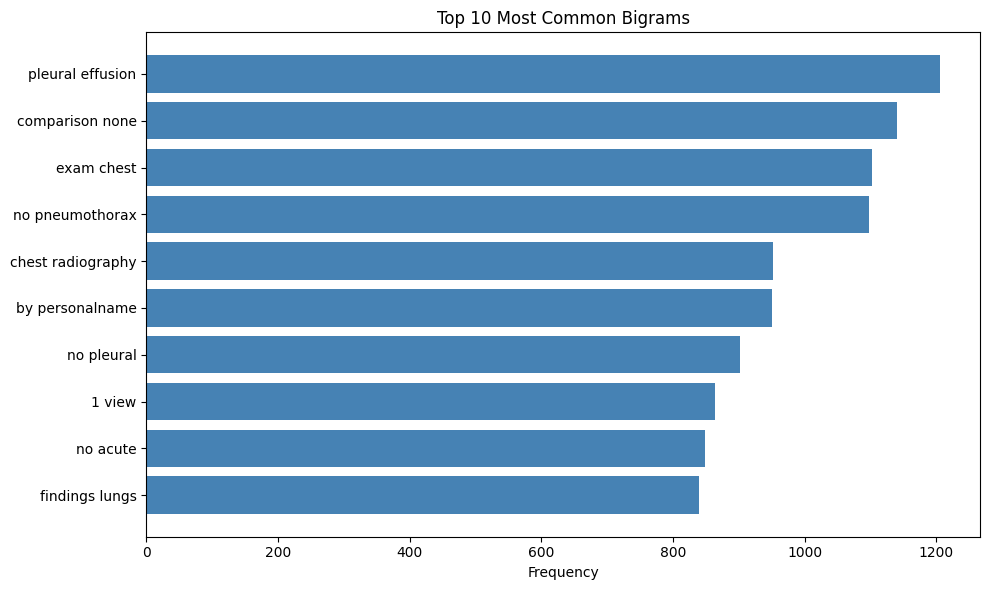

In [16]:
# Prepare data for plotting
bigram_labels = [' '.join(bigram) for bigram, count in top_bigrams]
bigram_counts_only = [count for bigram, count in top_bigrams]

plt.figure(figsize=(10, 6))
plt.barh(bigram_labels[::-1], bigram_counts_only[::-1], color='steelblue')  # reverse for largest on top
plt.xlabel('Frequency')
plt.title('Top 10 Most Common Bigrams')
plt.tight_layout()
plt.show()

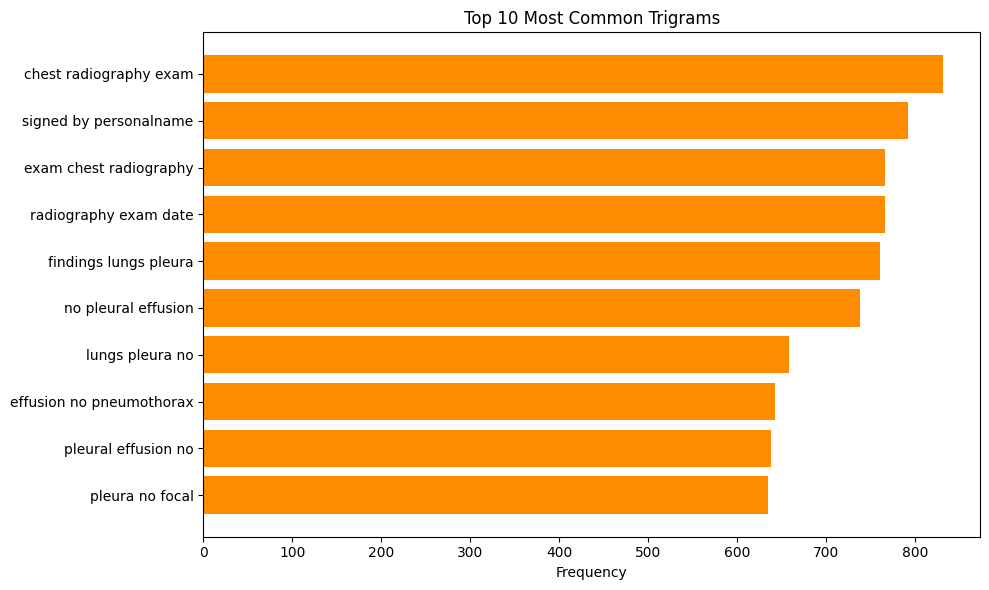

In [17]:
# Prepare data for plotting
trigram_labels = [' '.join(trigram) for trigram, count in top_trigrams]
trigram_counts_only = [count for trigram, count in top_trigrams]

plt.figure(figsize=(10, 6))
plt.barh(trigram_labels[::-1], trigram_counts_only[::-1], color='darkorange')
plt.xlabel('Frequency')
plt.title('Top 10 Most Common Trigrams')
plt.tight_layout()
plt.show()

In [ ]:
!pip install wordcloud

Most common words: [('chest', 4766), ('exam', 2956), ('normal', 2508), ('the', 2504), ('findings', 2014), ('view', 1918), ('comparison', 1898), ('impression', 1888), ('none', 1826), ('and', 1810)]


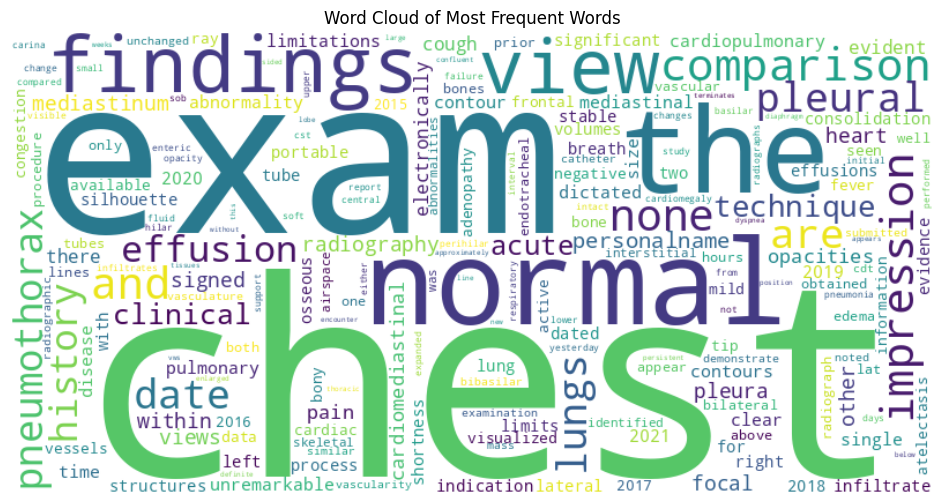

In [26]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
 
# Implemented To get a quick, intuitive overview of which words dominate the entire dataset.
# Concatenate all combined_text into a single string
all_text = ' '.join(df["combined_text"].tolist())

# Tokenize (reuse your function)
words = [w for w in basic_tokenize(all_text) if len(w) > 2]  # remove very short words

# Word frequency
word_counts = Counter(words)
print("Most common words:", word_counts.most_common(10))

#  Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()


In [13]:
!pip install scikit-learn


CLICOLOR=1
CLICOLOR_FORCE=1
CONDA_DEFAULT_ENV=base
CONDA_EXE=/opt/anaconda3/bin/conda
CONDA_PREFIX=/opt/anaconda3
CONDA_PROMPT_MODIFIER='(base) '
CONDA_PYTHON_EXE=/opt/anaconda3/bin/python
CONDA_SHLVL=1
FORCE_COLOR=1
GIT_PAGER=cat
GSETTINGS_SCHEMA_DIR=/opt/anaconda3/share/glib-2.0/schemas
GSETTINGS_SCHEMA_DIR_CONDA_BACKUP=''
HOME=/Users/aakash
JPY_PARENT_PID=12189
JPY_SESSION_NAME=/Users/aakash/Untitled.ipynb
KMP_DUPLICATE_LIB_OK=True
KMP_INIT_AT_FORK=FALSE
LANG=en_IN.UTF-8
LOGNAME=aakash
MPLBACKEND=module://matplotlib_inline.backend_inline
NVM_CD_FLAGS=-q
NVM_DIR=/Users/aakash/.nvm
NVM_RC_VERSION=''
OLDPWD=/Users/aakash
PAGER=cat
PATH=/Users/aakash/Downloads/google-cloud-sdk/bin:/opt/anaconda3/bin:/opt/anaconda3/condabin:/Users/aakash/.rbenv/shims:/Library/Frameworks/Python.framework/Versions/3.10/bin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/

In [12]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Use only the main sections (you can also use 'combined_text')
documents = df["combined_text"].tolist()

# Vectorize text (removing English stopwords, limiting features for interpretability)
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(documents)

# Fit LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display top words per topic
words = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx+1}:")
    print("  " + " ".join([words[i] for i in topic.argsort()[-10:][::-1]]))


Topic 1:
  chest exam normal view lungs effusion clinical radiography pneumothorax pleural
Topic 2:
  chest normal personalname acute findings comparison impression signed date exam
Topic 3:
  stable chest right left exam tube mild findings ap view
Topic 4:
  normal interstitial thoracic report radiograph evidence pneumonia pulmonary chest lateral
Topic 5:
  personalname chest tube support view airspace findings tubes yesterday exam


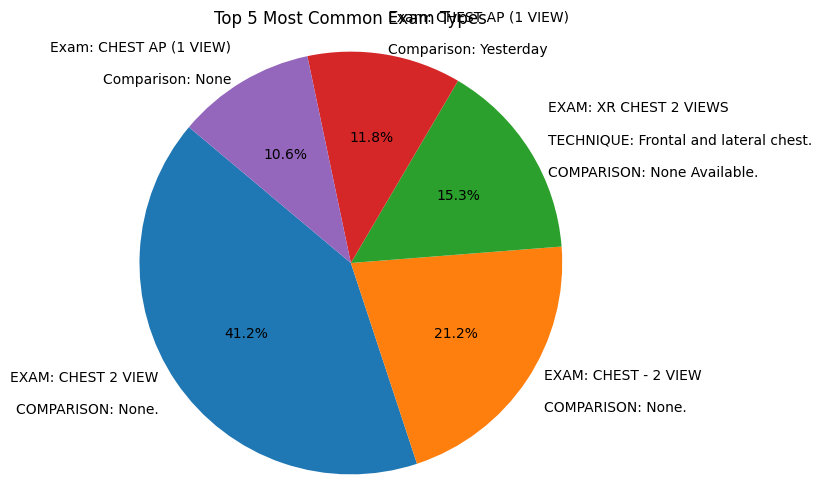

In [11]:
# Clean exam names a bit, get top 5
top_exams = df['ExamName'].value_counts().head(5)
plt.figure(figsize=(6,6))
plt.pie(top_exams, labels=top_exams.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Most Common Exam Types")
plt.axis('equal')
plt.show()

In [20]:
!pip install nltk gensim pyldavis
import nltk
import gensim
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return tokens

# Apply to your documents
data_processed = df['combined_text'].apply(preprocess).tolist()


CLICOLOR=1
CLICOLOR_FORCE=1
CONDA_DEFAULT_ENV=base
CONDA_EXE=/opt/anaconda3/bin/conda
CONDA_PREFIX=/opt/anaconda3
CONDA_PROMPT_MODIFIER='(base) '
CONDA_PYTHON_EXE=/opt/anaconda3/bin/python
CONDA_SHLVL=1
FORCE_COLOR=1
GIT_PAGER=cat
GSETTINGS_SCHEMA_DIR=/opt/anaconda3/share/glib-2.0/schemas
GSETTINGS_SCHEMA_DIR_CONDA_BACKUP=''
HOME=/Users/aakash
JPY_PARENT_PID=12189
JPY_SESSION_NAME=/Users/aakash/Untitled.ipynb
KMP_DUPLICATE_LIB_OK=True
KMP_INIT_AT_FORK=FALSE
LANG=en_IN.UTF-8
LOGNAME=aakash
MPLBACKEND=module://matplotlib_inline.backend_inline
NVM_CD_FLAGS=-q
NVM_DIR=/Users/aakash/.nvm
NVM_RC_VERSION=''
OLDPWD=/Users/aakash
PAGER=cat
PATH=/Users/aakash/Downloads/google-cloud-sdk/bin:/opt/anaconda3/bin:/opt/anaconda3/condabin:/Users/aakash/.rbenv/shims:/Library/Frameworks/Python.framework/Versions/3.10/bin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/

[nltk_data] Downloading package punkt to /Users/aakash/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aakash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/aakash/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
from gensim import corpora

# Create dictionary and corpus
id2word = corpora.Dictionary(data_processed)
corpus = [id2word.doc2bow(text) for text in data_processed]

In [22]:
from gensim.models import LdaModel

lda_model = LdaModel(corpus=corpus,
                     id2word=id2word,
                     num_topics=5, 
                     random_state=42,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)

# Print top 10 words per topic
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.100*"dictated" + 0.052*"normal" + 0.033*"chest" + 0.020*"cardiac" + 0.019*"pulmonary" + 0.019*"lung" + 0.014*"comparison" + 0.013*"abnormality" + 0.013*"none" + 0.013*"pleural"
Topic: 1 
Words: 0.084*"chest" + 0.065*"exam" + 0.050*"view" + 0.048*"normal" + 0.039*"none" + 0.030*"effusion" + 0.030*"comparison" + 0.030*"radiography" + 0.030*"clinical" + 0.030*"pneumothorax"
Topic: 2 
Words: 0.061*"chest" + 0.034*"normal" + 0.029*"view" + 0.029*"finding" + 0.027*"personalname" + 0.027*"exam" + 0.026*"none" + 0.026*"comparison" + 0.026*"impression" + 0.024*"acute"
Topic: 3 
Words: 0.060*"chest" + 0.035*"acute" + 0.032*"finding" + 0.029*"impression" + 0.029*"lung" + 0.028*"comparison" + 0.027*"normal" + 0.026*"view" + 0.024*"exam" + 0.022*"limit"
Topic: 4 
Words: 0.037*"chest" + 0.031*"tube" + 0.030*"exam" + 0.026*"stable" + 0.020*"view" + 0.020*"finding" + 0.019*"left" + 0.019*"right" + 0.017*"impression" + 0.017*"comparison"


In [23]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

pyldavis_data = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.display(pyldavis_data)
# In Jupyter, this will render an interactive visualization